[*********************100%***********************]  1 of 1 completed


Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447411  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458558  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355828  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344078  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386255  7.570714  7.571429  7.466429  7.510714  447610800
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  3522 non-null   float64
 1   (Close, AAPL)      3522 non-null   float64
 2   (High, AAPL)       3522 non-null   float64
 3   (Low, AAPL)        3522 non-null   float64
 4   (Open, 

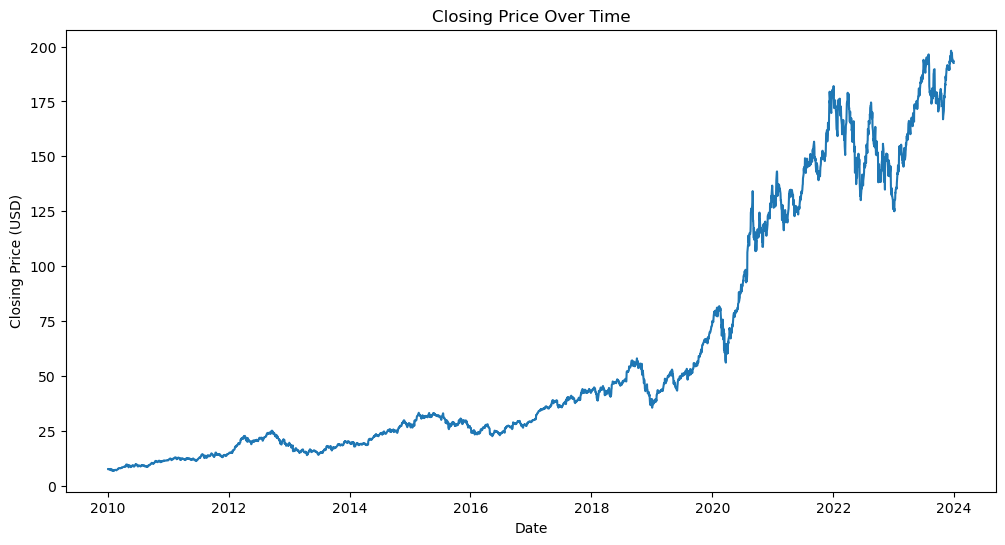

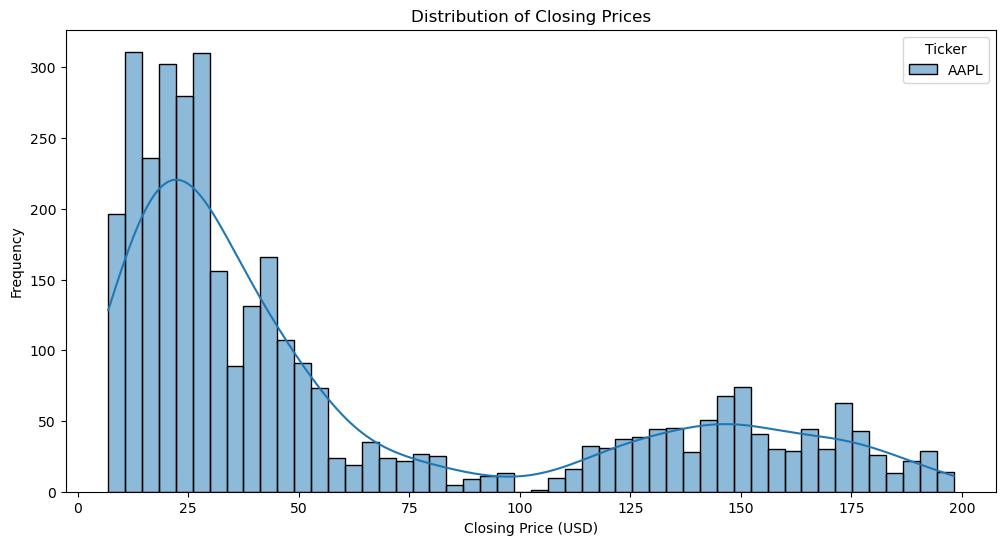

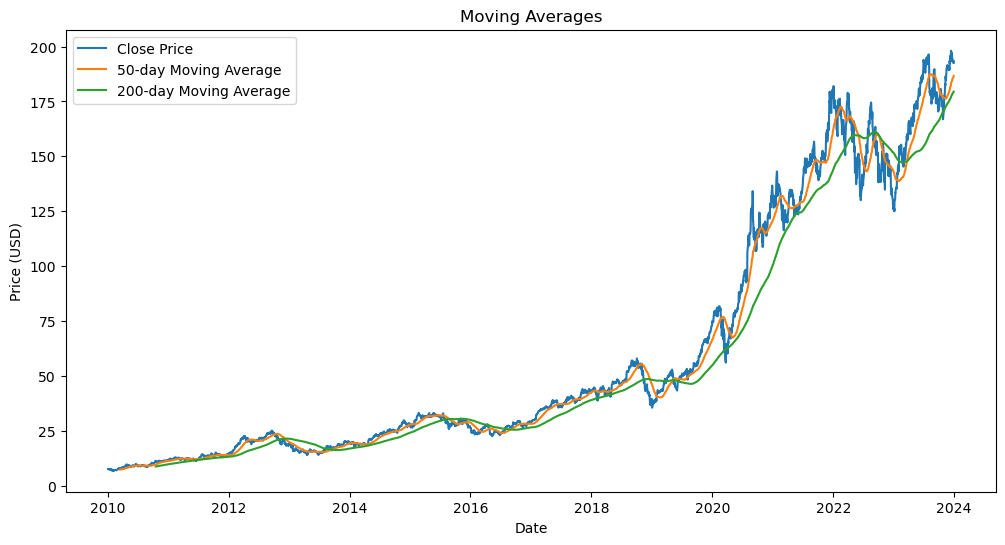

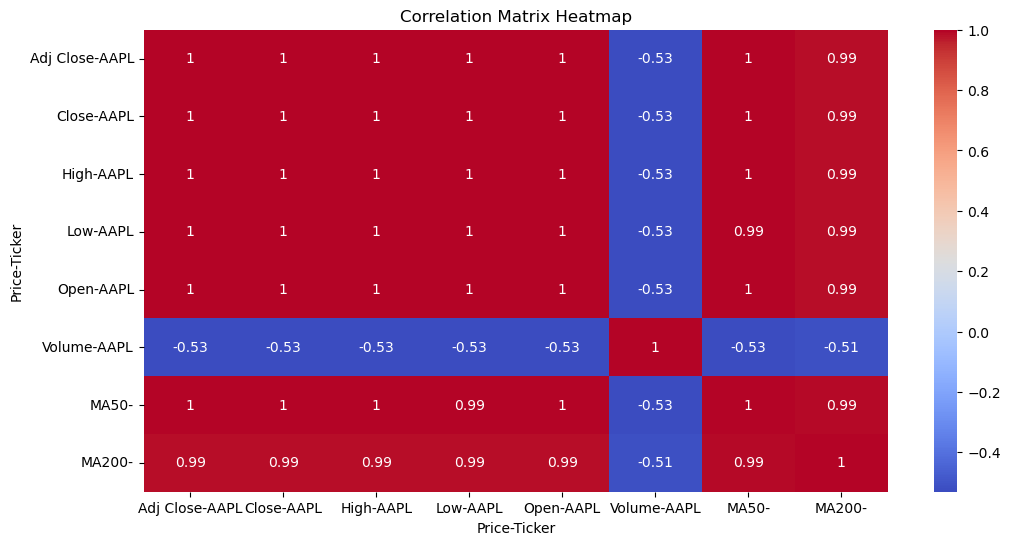

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2024-01-01')
print(data.head())

# Clean data
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
print(data.info())

# Basic statistics
print(data.describe())

# EDA
# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

# Plot distribution of closing prices
plt.figure(figsize=(12, 6))
sns.histplot(data['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Calculate and plot moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-day Moving Average')
plt.plot(data['MA200'], label='200-day Moving Average')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
